<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
df = pd.read_csv('./housing.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


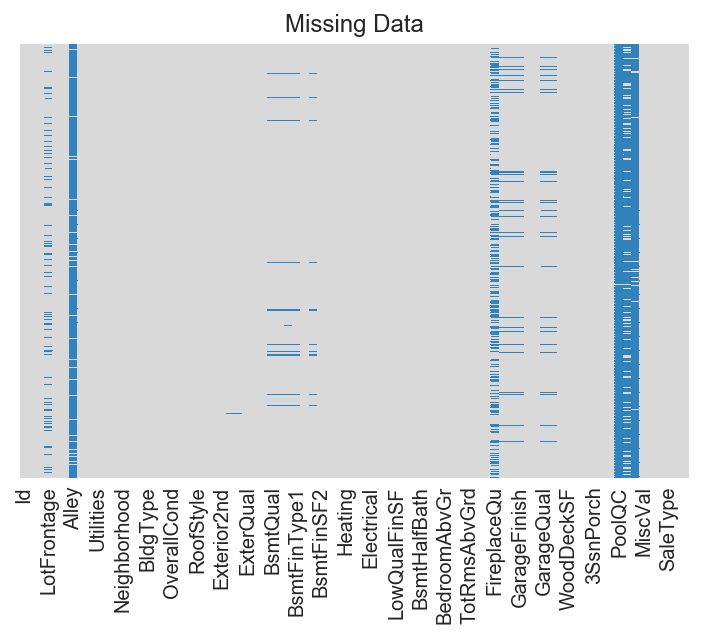

In [6]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [7]:
# To check if there are any missing values

for i,e in enumerate(df.columns):
    if df[e].isnull().sum() >0:
        print ((df.columns[i]),(df[e].isnull().sum()))

('LotFrontage', 259)
('Alley', 1369)
('MasVnrType', 8)
('MasVnrArea', 8)
('BsmtQual', 37)
('BsmtCond', 37)
('BsmtExposure', 38)
('BsmtFinType1', 37)
('BsmtFinType2', 38)
('Electrical', 1)
('FireplaceQu', 690)
('GarageType', 81)
('GarageYrBlt', 81)
('GarageFinish', 81)
('GarageQual', 81)
('GarageCond', 81)
('PoolQC', 1453)
('Fence', 1179)
('MiscFeature', 1406)


In [8]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

### Handling missing features -> Drop
Alley, PoolQC, PoolArea, Fence, MiscFeature, MiscVal

### Handling unnecessary features -> Drop
Id

In [9]:
# Alley, PoolQC, Fence and MiscFeature has too many missing values
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('PoolArea', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('MiscVal', axis=1, inplace=True)
df.drop('GarageYrBlt', axis=1, inplace=True) # Assume same year as Building being built

# We don't need Id
df.drop('Id', axis=1, inplace=True)

### Handling missing features -> Impute
LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
Electrical, FireplaceQu, 
GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt

In [10]:
# Feature Imputing 

df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = df.LotFrontage.median()

df.loc[df.MasVnrType.isnull(), 'MasVnrType'] = 'None'
df.loc[df.MasVnrType == 'None', 'MasVnrArea'] = 0

df.loc[df.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
df.loc[df.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
df.loc[df.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
df.loc[df.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
df.loc[df.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
df.loc[df.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
df.loc[df.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0

df.drop(df[df['Electrical'].isnull()].index,inplace=True)
df.loc[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'

df.loc[df.GarageType.isnull(), 'GarageType'] = 'NoGarage'
df.loc[df.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
df.loc[df.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
df.loc[df.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'

In [11]:
# To check if there are any missing values

for i,e in enumerate(df.columns):
    if df[e].isnull().sum() >0:
        print ((df.columns[i]),(df[e].isnull().sum()))

### Handling Non-residential data

In [12]:
pd.value_counts(df['MSZoning'])

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [13]:
# Drop Non-residential rows
df.drop(df[df['MSZoning'] == 'C (all)'].index,inplace=True)

# Feature Engineering

1. House Age (YrSold - YearBuilt)
2. Renovated (Yes-1/ No-0)
3. TotalBath = FullBath + BsmtFullBath + .5(HalfBath + BsmtHalfBath)

In [14]:
df['YearRemodAdd'].dtypes

dtype('int64')

In [15]:
# Creating House Age
df['Age'] = df['YrSold'] - df['YearBuilt']

# Creating Renovated
df['Renovated'] = df['YearRemodAdd'] - df['YearBuilt']
df['Renovated']= df['Renovated'].apply(lambda x: 1 if x>0 else 0)

In [16]:
df[['YearBuilt','YearRemodAdd','Renovated','YrSold','Age',]].head()

,YearBuilt,YearRemodAdd,Renovated,YrSold,Age
0,2003,2003,0,2008,5
1,1976,1976,0,2007,31
2,2001,2002,1,2008,7
3,1915,1970,1,2006,91
4,2000,2000,0,2008,8


In [17]:
df.drop('YearRemodAdd',axis=1,inplace=True)

In [18]:
df['TotalBath'] = df['FullBath'] + df['BsmtFullBath'] + 0.5*(df['HalfBath'] + df['BsmtHalfBath'])

In [19]:
df.drop('FullBath', axis=1, inplace=True)
df.drop('BsmtFullBath', axis=1, inplace=True)
df.drop('HalfBath', axis=1, inplace=True)
df.drop('BsmtHalfBath', axis=1, inplace=True)

### Exploring SalePrice

1. Identified Outliers -> Drop

/Users/bokshenggan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


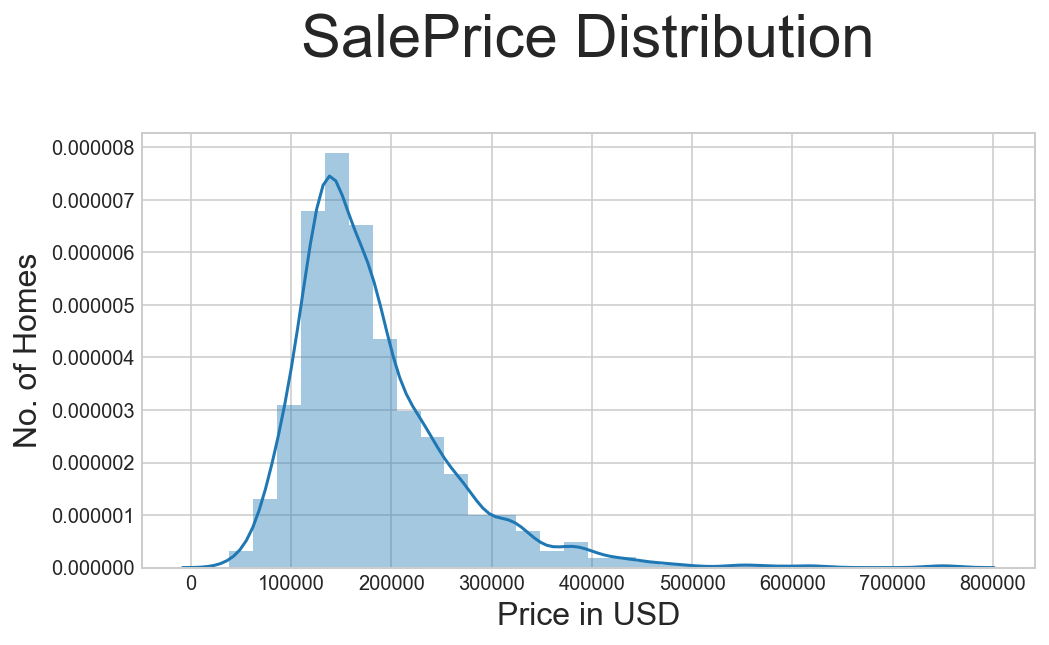

In [20]:
fig = plt.figure(figsize=(8,4))

ax = sns.distplot(df['SalePrice'], bins=30, kde=True)
ax.set_title('SalePrice Distribution\n', fontsize=30)
ax.set_ylabel('No. of Homes', fontsize=16)
ax.set_xlabel('Price in USD', fontsize=16)
plt.show()

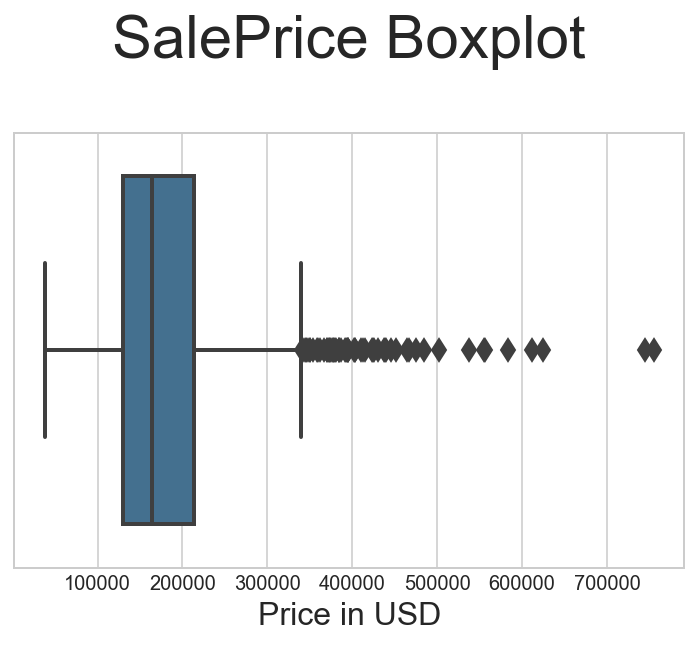

In [21]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(df['SalePrice'], orient='h',
                fliersize=8, linewidth=2, notch=False,
                saturation=0.5, ax=ax)

ax.set_title('SalePrice Boxplot\n', fontsize=30)
ax.set_xlabel('Price in USD', fontsize=16)

plt.show()

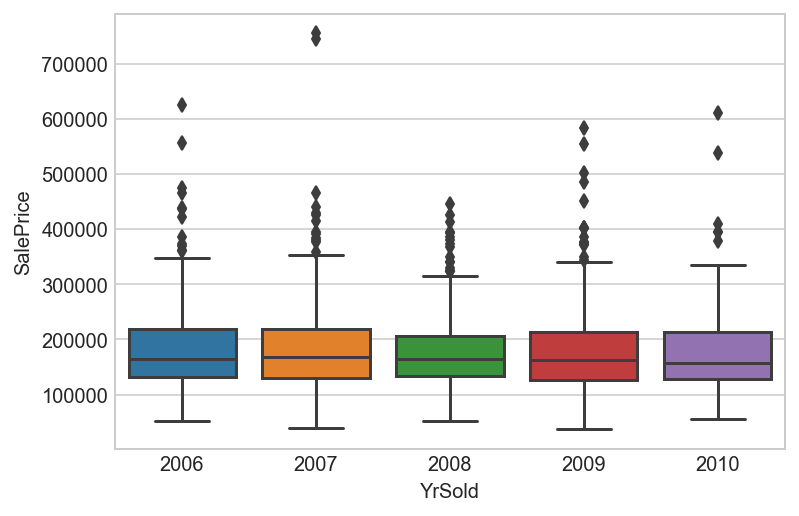

In [22]:
sns.boxplot(df['YrSold'],df['SalePrice'])

In [23]:
df[df['SalePrice']>700000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,Renovated,TotalBath
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,1,2007,WD,Normal,755000,13,1,4.0
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,7,2007,WD,Abnorml,745000,11,0,4.5


In [24]:
df.drop(df[df['SalePrice']>700000].index,inplace=True)

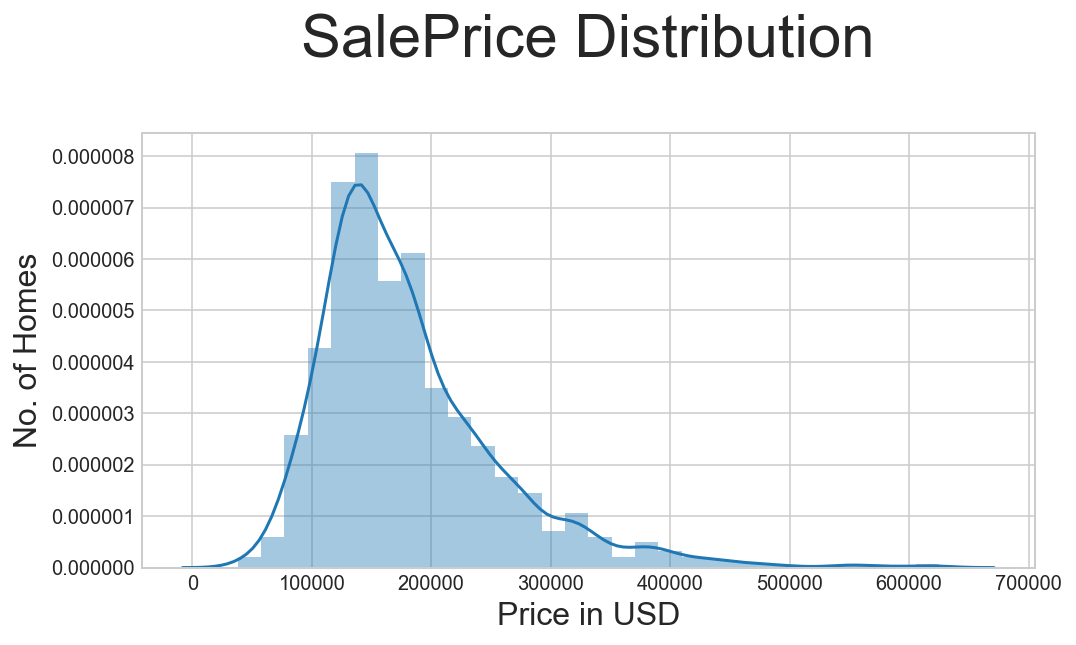

In [25]:
fig = plt.figure(figsize=(8,4))

ax = sns.distplot(df['SalePrice'], bins=30, kde=True)
ax.set_title('SalePrice Distribution\n', fontsize=30)
ax.set_ylabel('No. of Homes', fontsize=16)
ax.set_xlabel('Price in USD', fontsize=16)
plt.show()

In [26]:
len(df.columns)

71

In [27]:
df.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd',
       u'MasVnrType', u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation',
       u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF',
       u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical',
       u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea',
       u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageFinish', u'GarageCars', u'GarageArea', u'GarageQual',
       u'GarageCond', u'PavedDrive', u'WoodDeckSF', u'OpenPorchSF',
       u'E

### Fixed
**Continous Features**
LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotalBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,YearBuilt,
Age,YrSold,

**Ordinal Features**
ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,OverallQual,OverallCond,

**Categorical Features**
MSSubClass, MSZoning, Street,LotShape,LandContour, Utilities, LotConfig, LandSlope,Neighborhood,BldgType,HouseStyle,
MasVnrType,Foundation,CentralAir,Functional, GarageType,PavedDrive,

Exterior1st,Exterior2nd,Condition1,Condition2,

### Renovable

**Ordinal Features**
BsmtFinType1,BsmtFinType2,FireplaceQu,KitchenQual,GarageFinish,HeatingQC,GarageQual,GarageCond,

**Categorical Features**
Renovated',RoofStyle', RoofMatl',MoSold',SaleType,Electrical',Heating',

### Target
SalePrice, SaleCondition

## Handling unscaled ordinal categories

ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond,

In [28]:
# ExterQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1}

# Map feature values to scale
df['ExterQual'].replace(scale_mapper, inplace=True)

# ExterCond
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1}

# Map feature values to scale
df['ExterCond'].replace(scale_mapper, inplace=True)

# BsmtQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtQual'].replace(scale_mapper, inplace=True)

# BsmtCond
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtCond'].replace(scale_mapper, inplace=True)

# BsmtExposure
scale_mapper = {'Gd':3,
                'Av':2,
                'Mn':1,
                'No':0,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtExposure'].replace(scale_mapper, inplace=True)

# BsmtFinType1
scale_mapper = {'GLQ':6,
                'ALQ':5,
                'BLQ':4,
                'Rec':3,
                'LwQ':2,
                'Unf':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtFinType1'].replace(scale_mapper, inplace=True)

# BsmtFinType2
scale_mapper = {'GLQ':6,
                'ALQ':5,
                'BLQ':4,
                'Rec':3,
                'LwQ':2,
                'Unf':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtFinType2'].replace(scale_mapper, inplace=True)

# HeatingQC
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['HeatingQC'].replace(scale_mapper, inplace=True)

# KitchenQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['KitchenQual'].replace(scale_mapper, inplace=True)

#  FireplaceQu
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoFireplace':0}

# Map feature values to scale
df['FireplaceQu'].replace(scale_mapper, inplace=True)

#  GarageFinish
scale_mapper = {'Fin':3,
                'RFn':2,
                'Unf':1,
                'NA':0,
                'NoGarage':0}

# Map feature values to scale
df['GarageFinish'].replace(scale_mapper, inplace=True)

#  GarageQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoGarage':0}

# Map feature values to scale
df['GarageQual'].replace(scale_mapper, inplace=True)

#  GarageCond
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoGarage':0}

# Map feature values to scale
df['GarageCond'].replace(scale_mapper, inplace=True)

#  Functional
scale_mapper = {'Typ':7, 
                'Min1':6,
                'Min2':5,
                'Mod':4,
                'Maj1':3,
                'Maj2':2,
                'Sev':1,
                'Sal':0}

# Map feature values to scale
df['Functional'].replace(scale_mapper, inplace=True)

### Handling Categorical Features - Recurring

In [29]:
for i in list(df['Exterior1st'].unique()):
    if i not in list(df['Exterior2nd'].unique()):
                     print i

WdShing
CemntBd
BrkComm


In [30]:
for i in list(df['Exterior2nd'].unique()):
    if i not in list(df['Exterior1st'].unique()):
                     print i

Wd Shng
CmentBd
Brk Cmn
Other


In [31]:
# Changing Values in Exterior2nd to match
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'WdShing' if x == 'Wd Shng' else x)
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'CemntBd' if x == 'CmentBd' else x)
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'BrkComm' if x == 'Brk Cmn' else x)

In [32]:
# Capturing list of values 
exterior = []

for i in list(df['Exterior2nd'].unique()):
    exterior.append(i)

In [33]:
print(exterior)

['VinylSd', 'MetalSd', 'WdShing', 'HdBoard', 'Plywood', 'Wd Sdng', 'CemntBd', 'BrkFace', 'Stucco', 'AsbShng', 'BrkComm', 'ImStucc', 'AsphShn', 'Stone', 'Other', 'CBlock']


In [34]:
df['Exterior1st'] = df['Exterior1st'].apply(lambda x: 'Other' if x == 'Other' else x+str(1))
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'Other' if x == 'Other' else x+str(2))

In [35]:
dummy = pd.get_dummies(df['Exterior1st'])
df = pd.concat([df, dummy], axis=1)
df.drop('Exterior1st', axis=1, inplace=True)

dummy = pd.get_dummies(df['Exterior2nd'])
df = pd.concat([df, dummy], axis=1)
df.drop('Exterior2nd', axis=1, inplace=True)

In [36]:
# Creating 3rd Set of Columns
for i in ['VinylSd', 'MetalSd', 'WdShing', 'HdBoard',
          'Plywood', 'Wd Sdng', 'CemntBd', 'BrkFace',
          'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
          'AsphShn', 'Stone', 'CBlock']:
    df[i] = df[i+str(1)]+df[i+str(2)]
    df.drop(i+str(1), axis=1, inplace=True)
    df.drop(i+str(2), axis=1, inplace=True)

# Aggregating final set
for i in ['VinylSd','MetalSd', 'WdShing', 'HdBoard',
          'Plywood', 'Wd Sdng', 'CemntBd', 'BrkFace',
          'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
          'AsphShn', 'Stone', 'CBlock','Other']:
    df[i] = df[i].apply(lambda x: 1 if x>0 else x)

In [37]:
df[['VinylSd','MetalSd', 'WdShing', 'HdBoard',
          'Plywood', 'Wd Sdng', 'CemntBd', 'BrkFace',
          'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
          'AsphShn', 'Stone', 'CBlock','Other']].head()

,VinylSd,MetalSd,WdShing,HdBoard,Plywood,Wd Sdng,CemntBd,BrkFace,Stucco,AsbShng,BrkComm,ImStucc,AsphShn,Stone,CBlock,Other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Drop one dummy variable
df.drop('VinylSd', axis=1, inplace=True)

In [39]:
for i in list(df['Condition1'].unique()):
    if i not in list(df['Condition2'].unique()):
                     print i

RRNe


In [40]:
for i in list(df['Condition2'].unique()):
    if i not in list(df['Condition1'].unique()):
                     print i

In [41]:
condition = []

for i in list(df['Condition1'].unique()):
    condition.append(i)

In [42]:
print(condition)

['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']


In [43]:
df['Condition1'] = df['Condition1'].apply(lambda x: 'RRNe' if x == 'RRNe' else x+str(1))
df['Condition2'] = df['Condition2'].apply(lambda x: 'RRNe' if x == 'RRNe' else x+str(2))

In [44]:
dummy = pd.get_dummies(df['Condition1'])
df = pd.concat([df, dummy], axis=1)
df.drop('Condition1', axis=1, inplace=True)

dummy = pd.get_dummies(df['Condition2'])
df = pd.concat([df, dummy], axis=1)
df.drop('Condition2', axis=1, inplace=True)

In [45]:
# Creating 3rd Set of Columns
for i in ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA']:
    df[i] = df[i+str(1)]+df[i+str(2)]
    df.drop(i+str(1), axis=1, inplace=True)
    df.drop(i+str(2), axis=1, inplace=True)

# Aggregating final set
for i in ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']:
    df[i] = df[i].apply(lambda x: 1 if x>0 else x)

In [46]:
df[['Norm','Feedr','PosN','Artery','RRAe','RRNn','RRAn','PosA','RRNe']].head()

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe
0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [47]:
# Drop one dummy variable
df.drop('Norm',axis=1, inplace=True)

### Handling Categorical Features - Non- Recurring

In [48]:
# Central Air
df['CentralAir'] = df['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

In [49]:
# Converting MSSubClass data type to string
df['MSSubClass'] = df['MSSubClass'].apply(lambda x: 'Class'+str(x))

In [50]:
# MoSold
df['MoSold'] = df['MoSold'].apply(lambda x:'mon'+str(x))

In [51]:
pd.value_counts(df['CentralAir'])

1    1358
0      89
Name: CentralAir, dtype: int64

In [52]:
# To drop off renovable features
df1 = df.copy(deep=True)

In [53]:
df1.drop(['BsmtFinType1','BsmtFinType2','FireplaceQu','KitchenQual','GarageFinish','GarageQual','GarageCond','HeatingQC',
          'RoofStyle','RoofMatl','MoSold','SaleType','SaleCondition',
          'Renovated','Electrical','Heating'], axis=1, inplace=True)

In [54]:
# Categorical Features for part 1 Exclude YearSold, CentralAir
Cat = ['MSSubClass','MSZoning','Street','LotShape','LandContour',
       'Utilities','LotConfig','LandSlope','Neighborhood','BldgType',
       'HouseStyle','MasVnrType','Foundation','GarageType','PavedDrive',]

In [55]:
for i in Cat:
    dummy = pd.get_dummies(df1[i],drop_first=True)
    df1 = pd.concat([df1, dummy], axis=1)
    df1.drop(i, axis=1, inplace=True)

In [56]:
print(df1.select_dtypes(['object']).columns)

Index([], dtype='object')


In [57]:
df1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Stone,Wood,Attchd,Basment,BuiltIn,CarPort,Detchd,NoGarage,P,Y
0,65.0,8450,7,5,2003,196.0,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1
1,80.0,9600,6,8,1976,0.0,3,3,4,3,...,0,0,1,0,0,0,0,0,0,1
2,68.0,11250,7,5,2001,162.0,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1
3,60.0,9550,7,5,1915,0.0,3,3,3,4,...,0,0,0,0,0,0,1,0,0,1
4,84.0,14260,8,5,2000,350.0,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1


In [58]:
# Defining training and test set
train = df1[df1['YrSold'] < 2010]
test = df1[df1['YrSold'] == 2010]

In [59]:
cols = list(df1.columns)
cols.remove('SalePrice')

X_train = train[cols]
X_test = test[cols]

y_train = train['SalePrice'].values
y_test = test['SalePrice'].values

In [60]:
baseline = df1['SalePrice'].mean()
baseline

180879.17484450588

In [61]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1275, 150) (1275,)
(172, 150) (172,)


In [62]:
# Using KBest to determine best features
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_regression, k=20)
skb_chi2 = SelectKBest(chi2, k=20)

# Train the selector on the data.
skb_f.fit(X_train, y_train)
skb_chi2.fit(X_train, y_train)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest.head(10)

,feature,f_classif,chi2 score
2,OverallQual,2206.81,324.257
19,GrLivArea,1163.58,165602
6,ExterQual,1119.24,92.5591
25,GarageCars,941.435,284.72
26,GarageArea,886.652,86560.2
34,TotalBath,816.875,262.12
14,TotalBsmtSF,710.098,152982
8,BsmtQual,696.737,205.044
16,1stFlrSF,683.199,106890
22,TotRmsAbvGrd,492.848,317.92


Based on Kbest, the following features 
**['Other','OverallQual','Neighbourhood', 'ExterQual', 'LotArea', 'LandContour','GrLivArea','BsmtQual','TotalBath']**



In [63]:
# Repeat Steps with Lasso Linear Regression

cols = list(df1.columns)
cols.remove('SalePrice')

X_train = train[cols]
X_test = test[cols]

y_train = train['SalePrice'].values
y_test = test['SalePrice'].values

In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_train)
Xst = ss.fit_transform(X_test)

In [65]:
from sklearn.linear_model import LassoCV ,Lasso
from sklearn.model_selection import cross_val_score

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y_train)

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xs, y_train, cv=10)

print lasso_scores
print np.mean(lasso_scores)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 0.89317874  0.8847524   0.88253239  0.78965891  0.87640269  0.86225131
  0.86427754  0.83002839  0.55949146  0.87833944]
0.832091326658


In [66]:
lasso.fit(Xs, y_train)
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

,abs_coef,coef,variable
19,17291.535031,17291.535031,GrLivArea
2,15609.037282,15609.037282,OverallQual
108,11399.906081,11399.906081,NridgHt
25,7304.024830,7304.024830,GarageCars
34,7196.134316,7196.134316,TotalBath
114,6700.226254,6700.226254,StoneBr
107,6535.605067,6535.605067,NoRidge
6,6263.608148,6263.608148,ExterQual
22,5932.855615,5932.855615,TotRmsAbvGrd
10,5925.678606,5925.678606,BsmtExposure


In [67]:
# Experiment with Features
cols = ['OverallQual',
        'TotalBath',
        'TotRmsAbvGrd',
        'YearBuilt',
        'ExterQual', 
        'LotArea', 
        'GrLivArea',
        'BsmtQual', 
        'GarageCars',
        'CollgCr','OldTown','NAmes','SawyerW','Sawyer','Edwards','Somerst','Gilbert','NridgHt','NWAmes','BrkSide',
        'Crawfor','Mitchel','NoRidge','Timber','IDOTRR','ClearCr','SWISU','StoneBr','MeadowV','BrDale',
        'Veenker','NPkVill','Blueste',]

X_train = train[cols]
X_test = test[cols]

In [68]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_train)
Xst = ss.fit_transform(X_test)

In [69]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lr = linear_model.LinearRegression()
model = lr.fit(Xs, y_train)

print('Training accuracy:', lr.score(Xs, y_train))
print('Test accuracy:', lr.score(Xst, y_test))

('Training accuracy:', 0.82420554406484325)
('Test accuracy:', 0.82579193785676563)


The above features explain approximately 83% of the variance in our target variable

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [95]:
lasso_resid = y_test - model.predict(Xst)

3775834.2085591741

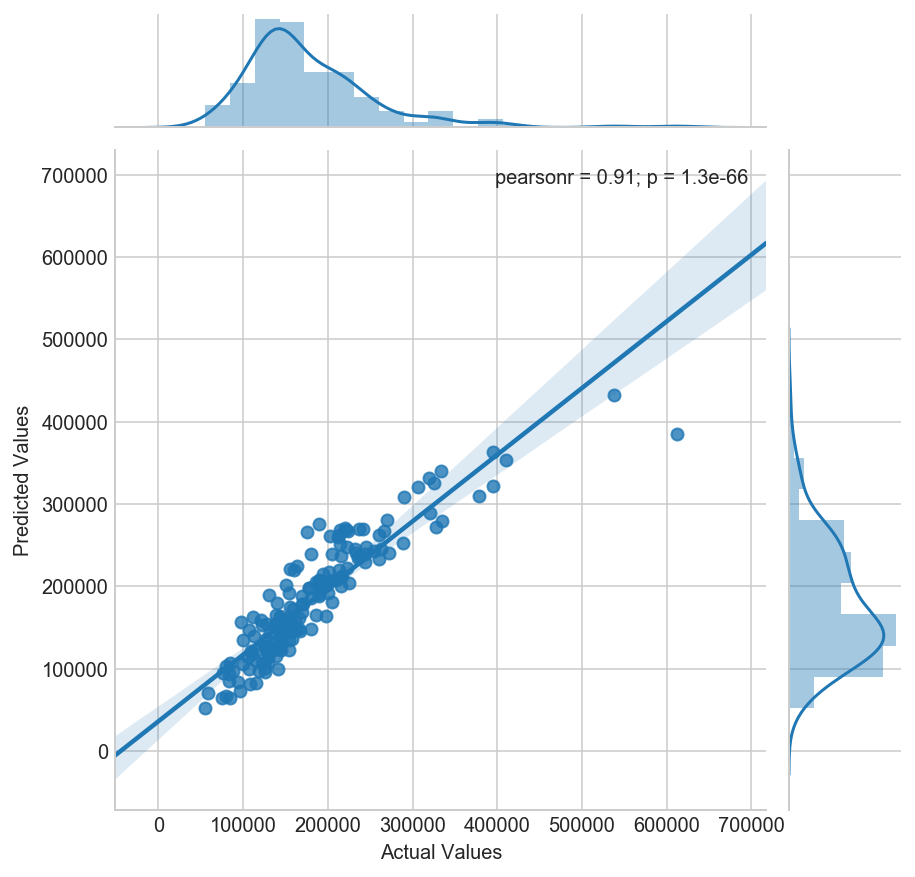

In [71]:
ax=sns.jointplot(y_test,model.predict(Xst), kind='reg')
ax.set_axis_labels('Actual Values', 'Predicted Values')

**Predicted Sale Prices showed a few over-prediction in sale price of very expensive homes**

In [72]:
df2 = df.copy(deep=True)
df2 = df2[['BsmtFinType1','BsmtFinType2','FireplaceQu','KitchenQual','GarageFinish','HeatingQC','GarageQual','GarageCond',
           'RoofStyle','RoofMatl','Renovated','Electrical','Heating','SalePrice','YrSold']]

In [73]:
df2.columns

Index([u'BsmtFinType1', u'BsmtFinType2', u'FireplaceQu', u'KitchenQual',
       u'GarageFinish', u'HeatingQC', u'GarageQual', u'GarageCond',
       u'RoofStyle', u'RoofMatl', u'Renovated', u'Electrical', u'Heating',
       u'SalePrice', u'YrSold'],
      dtype='object')

In [74]:
df2.head()

,BsmtFinType1,BsmtFinType2,FireplaceQu,KitchenQual,GarageFinish,HeatingQC,GarageQual,GarageCond,RoofStyle,RoofMatl,Renovated,Electrical,Heating,SalePrice,YrSold
0,6,1,0,4,2,5,3,3,Gable,CompShg,0,SBrkr,GasA,208500,2008
1,5,1,3,3,2,5,3,3,Gable,CompShg,0,SBrkr,GasA,181500,2007
2,6,1,3,4,2,5,3,3,Gable,CompShg,1,SBrkr,GasA,223500,2008
3,5,1,4,4,1,4,3,3,Gable,CompShg,1,SBrkr,GasA,140000,2006
4,6,1,3,4,2,5,3,3,Gable,CompShg,0,SBrkr,GasA,250000,2008


### Handling Categorical Features - Non- Recurring

In [75]:
# Categorical Features for Part2 Exclude YearSold, CentralAir
Cat2 = ['RoofStyle','RoofMatl','Electrical','Heating']

In [76]:
for i in Cat2:
    dummy = pd.get_dummies(df2[i],drop_first=True)
    df2 = pd.concat([df2, dummy], axis=1)
    df2.drop(i, axis=1, inplace=True)

In [77]:
df2.head()

,BsmtFinType1,BsmtFinType2,FireplaceQu,KitchenQual,GarageFinish,HeatingQC,GarageQual,GarageCond,Renovated,SalePrice,...,WdShngl,FuseF,FuseP,Mix,SBrkr,GasA,GasW,Grav,OthW,Wall
0,6,1,0,4,2,5,3,3,0,208500,...,0,0,0,0,1,1,0,0,0,0
1,5,1,3,3,2,5,3,3,0,181500,...,0,0,0,0,1,1,0,0,0,0
2,6,1,3,4,2,5,3,3,1,223500,...,0,0,0,0,1,1,0,0,0,0
3,5,1,4,4,1,4,3,3,1,140000,...,0,0,0,0,1,1,0,0,0,0
4,6,1,3,4,2,5,3,3,0,250000,...,0,0,0,0,1,1,0,0,0,0


In [78]:
df2.get_dtype_counts()

int64    11
uint8    21
dtype: int64

In [79]:
train2 = df2[df2['YrSold'] < 2010]
test2 = df2[df2['YrSold'] == 2010]

In [80]:
cols = list(df2.columns)
cols.remove('SalePrice')

X_train2 = train2[cols]
X_test2 = test2[cols]

y_train2 = train2['SalePrice'].values
y_test2 = test2['SalePrice'].values

In [81]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs2 = ss.fit_transform(X_train2)
Xst2 = ss.fit_transform(X_test2)

In [82]:
from sklearn.linear_model import LassoCV ,Lasso
from sklearn.model_selection import cross_val_score

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs2, y_train2)

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xs2, y_train2, cv=10)

print lasso_scores
print np.mean(lasso_scores)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 0.69187166  0.6414215   0.65709674  0.6068322   0.58111974  0.55206547
  0.53363243  0.58670727  0.53241149  0.60220127]
0.598535977684


.........................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


In [83]:
lasso.fit(Xs2, y_train2)
lasso_coefs = pd.DataFrame({'variable':X_train2.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(20)

,abs_coef,coef,variable
3,29618.030323,29618.030323,KitchenQual
2,20192.640284,20192.640284,FireplaceQu
4,13775.996667,13775.996667,GarageFinish
0,8054.659707,8054.659707,BsmtFinType1
5,7035.369006,7035.369006,HeatingQC
21,5722.692752,5722.692752,WdShngl
10,4636.199379,-4636.199379,Gable
12,3951.143597,3951.143597,Hip
27,3577.409449,3577.409449,GasW
9,1651.724831,-1651.724831,YrSold


In [84]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(Xs2, y_train2)
print('Training accuracy:', lr.score(Xs2, y_train2))
print('Test accuracy:', lr.score(Xst2, y_test2))

('Training accuracy:', 0.62314477620770581)
('Test accuracy:', 0.5926706754313158)


In [85]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
model = lasso.fit(Xs2, y_train2)
print('Training accuracy:', lr.score(Xs2, y_train2))
print('Test accuracy:', lr.score(Xst2, y_test2))

('Training accuracy:', 0.62314477620770581)
('Test accuracy:', 0.5926706754313158)


In [86]:
df1['KitchenQual'] = df2['KitchenQual']
df1['FireplaceQu'] = df2['FireplaceQu']
df1['GarageFinish'] = df2['GarageFinish']
df1['BsmtFinType1'] = df2['BsmtFinType1']
df1['HeatingQC'] = df2['HeatingQC']

In [87]:
train = df1[df1['YrSold'] < 2010]
test = df1[df1['YrSold'] == 2010]

In [88]:
cols = ['OverallQual',
        'TotalBath',
        'TotRmsAbvGrd',
        'YearBuilt',
        'ExterQual', 
        'LotArea', 
        'GrLivArea',
        'BsmtQual', 
        'GarageCars',
        'CollgCr','OldTown','NAmes','SawyerW','Sawyer','Edwards','Somerst','Gilbert','NridgHt','NWAmes','BrkSide',
        'Crawfor','Mitchel','NoRidge','Timber','IDOTRR','ClearCr','SWISU','StoneBr','MeadowV','BrDale',
        'Veenker','NPkVill','Blueste',
        'KitchenQual','FireplaceQu','GarageFinish','BsmtFinType1','HeatingQC']

X_train = train[cols]
X_test = test[cols]

In [89]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_train)
Xst = ss.fit_transform(X_test)

In [90]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(Xs, y_train)
print('Training accuracy:', lr.score(Xs, y_train))
print('Test accuracy:', lr.score(Xst, y_test))

('Training accuracy:', 0.83522736172456169)
('Test accuracy:', 0.8394275663520705)


In [91]:
# After adding KitchenQual ->0.82579 -> 0.83571
# After adding FireplaceQual ->0.83571 -> 0.83762
# After adding GarageFinish ->0.83762 -> 0.83816
# After adding BsmtFinType1 ->0.83816 -> 0.84013
# After adding HeatingQu ->0.84013 -> 0.83942

**1. Evaluate the effect in dollars of the renovate-able features. **

**2.How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. **

**3. Investigate how much of the variance in price remaining is explained by these features.**

**4. Do you trust your model? Should it be used to evaluate which properties to buy and fix up?**

In [92]:
Yes.

SyntaxError: invalid syntax (<ipython-input-92-734ac6731407>, line 1)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
pd.value_counts(df['SaleCondition'])

In [ ]:
df3 = df.copy(deep=True)

In [ ]:
df3.head()

In [ ]:
pd.value_counts(df3['SaleCondition'])

In [ ]:
df3['SaleCondition'] = df3['SaleCondition'].apply(lambda x: 1 if x == 'Abnorml' else 0)

In [ ]:
pd.value_counts(df3['SaleCondition'])

In [ ]:
# Categorical Features for Part2 Exclude YearSold, CentralAir
Cat2 = ['RoofStyle','RoofMatl','MoSold','SaleType','Electrical','Heating']

In [ ]:
for i in Cat2:
    dummy = pd.get_dummies(df3[i],drop_first=True)
    df3 = pd.concat([df3, dummy], axis=1)
    df3.drop(i, axis=1, inplace=True)

In [ ]:
# Categorical Features for part 1 Exclude YearSold, CentralAir
Cat = ['MSSubClass','MSZoning','Street','LotShape','LandContour',
       'Utilities','LotConfig','LandSlope','Neighborhood','BldgType',
       'HouseStyle','MasVnrType','Foundation','GarageType','PavedDrive',]

In [ ]:
for i in Cat:
    dummy = pd.get_dummies(df3[i],drop_first=True)
    df3 = pd.concat([df3, dummy], axis=1)
    df3.drop(i, axis=1, inplace=True)

In [ ]:
df3.drop('SalePrice',axis=1,inplace=True)

In [ ]:
df3.columns

In [ ]:
pd.value_counts(df3['SaleCondition'])

In [ ]:
train3 = df3[df3['YrSold'] < 2010]
test3 = df3[df3['YrSold'] == 2010]

In [ ]:
cols = list(df3.columns)
cols.remove('SaleCondition')

X_train3 = train3[cols]
X_test3 = test3[cols]

y_train3 = train3['SaleCondition'].values
y_test3 = test3['SaleCondition'].values

In [ ]:
baseline = 1- np.mean(y_test3)
baseline

In [ ]:
print X_train3.shape, y_train3.shape
print X_test3.shape, y_test3.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs3 = ss.fit_transform(X_train3)
Xst3 = ss.fit_transform(X_test3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
accs = cross_val_score(knn, Xs3, y_train3, cv=10)

print accs
print np.mean(accs)

In [ ]:
knn.fit(Xs3,y_train3)
knn.score(Xst3, y_test3)

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df3[df3['SaleCondition']==0]
df_minority = df3[df3['SaleCondition']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1352,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['SaleCondition'].value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

In [ ]:
train3 = df_upsampled[df_upsampled['YrSold'] < 2010]
test3 = df_upsampled[df_upsampled['YrSold'] == 2010]

In [ ]:
pd.value_counts(test3['SaleCondition'])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# Train the selector on the data.
skb_f.fit(X_train3, y_train3)
skb_chi2.fit(X_train3, y_train3)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest

In [ ]:
cols = list(df3.columns)
cols.remove('SaleCondition')

X_train3 = train3[cols]
X_test3 = test3[cols]

y_train3 = train3['SaleCondition'].values
y_test3 = test3['SaleCondition'].values

In [ ]:
print X_train3.shape, y_train3.shape
print X_test3.shape, y_test3.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs3 = ss.fit_transform(X_train3)
Xst3 = ss.fit_transform(X_test3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
accs = cross_val_score(knn, Xs3, y_train3, cv=10)

print accs
print np.mean(accs)

In [ ]:
knn.fit(Xs3,y_train3)
knn.score(Xst3, y_test3)

In [ ]:
from sklearn.metrics import roc_curve, auc

yhat = knn.predict(Xst3)
yhat_pp = knn.predict_proba(Xst3)

In [ ]:
pd.value_counts(test3['SaleCondition'])

In [ ]:
fpr, tpr, _ = roc_curve(test3['SaleCondition'], yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: abnormal sale', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df3[df3['SaleCondition']==0]
df_minority = df3[df3['SaleCondition']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1352,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['SaleCondition'].value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

In [ ]:
train3 = df_upsampled[df_upsampled['YrSold'] < 2010]
test3 = df_upsampled[df_upsampled['YrSold'] == 2010]

In [ ]:
cols = ['ExterQual','OverallQual','KitchenQual','FireplaceQu','Age','YrSold',
        'GarageCars','GarageFinish','GarageCond','GarageQual',
        #'Attchd','Basment','BuiltIn','CarPort','Detchd','NoGarage',
        'SBrkr','FuseF','FuseP','Mix',
        'GasA','GasW','OthW','Wall','Grav',
        'Reg','IR2','IR3']

X_train3 = train3[cols]
X_test3 = test3[cols]

y_train3 = train3['SaleCondition'].values
y_test3 = test3['SaleCondition'].values

In [ ]:
print X_train3.shape, y_train3.shape
print X_test3.shape, y_test3.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs3 = ss.fit_transform(X_train3)
Xst3 = ss.fit_transform(X_test3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
accs = cross_val_score(knn, Xs3, y_train3, cv=10)

print accs
print np.mean(accs)

In [ ]:
knn.fit(Xs3,y_train3)
knn.score(Xst3, y_test3)

In [ ]:
from sklearn.metrics import roc_curve, auc

yhat = knn.predict(Xst3)
yhat_pp = knn.predict_proba(Xst3)

In [ ]:
fpr, tpr, _ = roc_curve(test3['SaleCondition'], yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: abnormal sale', fontsize=18)
plt.legend(loc="lower right")
plt.show()